## Análise das Contas

<img src="contas.jpg">

O BanVic possui atualmente 998 contas, uma para cada cliente.
Nessa análise, vamos entender mais sobre elas.

In [1]:
# Importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Tamanho dos gráficos
plt.rcParams["figure.figsize"] = [10,5]
# Tamanho dos dados
plt.rcParams["font.size"] = 12

# Lendo a guia 'contas' da planilha 'projeto3.xlsx'
df_contas = pd.read_excel("base_excel.xlsx", sheet_name = "contas")

In [2]:
df_contas.head()

,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,horario_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento,horario_ultimo_lancamento
0,53,53,1,7,PF,2011-05-24,15:30:00,2984.76,2814.67,2019-07-02,11:03:46
1,190,190,1,7,PF,2014-10-17,14:48:00,4262.43,4191.86,2021-03-25,12:00:15
2,191,191,1,7,PF,2013-03-23,14:14:00,3266.57,3080.71,2016-09-09,23:34:15
3,203,203,1,7,PF,2016-08-03,16:13:00,21241.54,19461.56,2022-12-28,07:58:24
4,254,254,1,7,PF,2012-10-24,13:48:00,13335.70,13197.54,2013-12-20,22:20:00


Na tabela acima, temos uma visão das primeiras 5 linhas dos nosso dados referentes as contas. 

In [3]:
df_contas['tipo_conta'].describe()

count     998
unique      1
top        PF
freq      998
Name: tipo_conta, dtype: object

Temos apenas clientes PF, isto é, Pessoas Físicas.

In [4]:
df_contas['data_abertura'].describe()

C:\Users\jotav\AppData\Local\Temp\ipykernel_15524\4158529553.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_contas['data_abertura'].describe()


count                     998
unique                    869
top       2019-01-10 00:00:00
freq                        4
first     2010-02-02 00:00:00
last      2022-12-27 00:00:00
Name: data_abertura, dtype: object

A primeira conta foi aberta no dia 02/02/2010. E a última conta aberta foi em 27/12/2022.

In [5]:
df_contas.groupby('cod_agencia')['saldo_total'].describe()

,count,mean,std,min,25%,50%,75%,max
cod_agencia,,,,,,,,
1,118.0,31165.301441,39232.080203,18.42,3655.7200,16234.880,41964.7425,232815.79
2,101.0,31424.775644,46116.170409,16.80,2967.7200,17405.560,38945.7400,238990.88
3,76.0,25279.805526,32989.782256,4.34,1600.5275,13631.535,35695.8275,149048.22
4,65.0,22967.100000,30855.341868,6.09,2195.1400,8302.290,32232.6800,137649.19
5,61.0,27911.073607,38257.025911,20.86,1973.9300,14816.410,36948.7100,183979.04
6,52.0,23116.811538,52372.172902,1.31,800.1825,9917.645,20880.7125,341020.82
7,460.0,26168.032370,44699.299679,1.22,749.6400,10432.590,34546.2600,419923.18
8,30.0,16223.090000,28949.986933,20.26,169.8875,658.665,15456.8500,119106.69
9,30.0,23320.187667,33404.344847,53.16,750.4275,7812.205,33719.5650,153177.78


Observando a tabela acima, podemos extrair as seguintes informações:

* A agência 7 (Agência Digital) possui 460 contas registradas. Enquanto se somarmos todas as agências físicas, temos 538 contas.
* Observando todas agências listadas, a conta com menor Saldo Total tem 1,22 reais e a com maior Saldo Total tem 419.923,18 reais, que por coincidência estão ambas na Agência Digital.


Focamos em analisar sob o ponto de vista da Agência Digital.

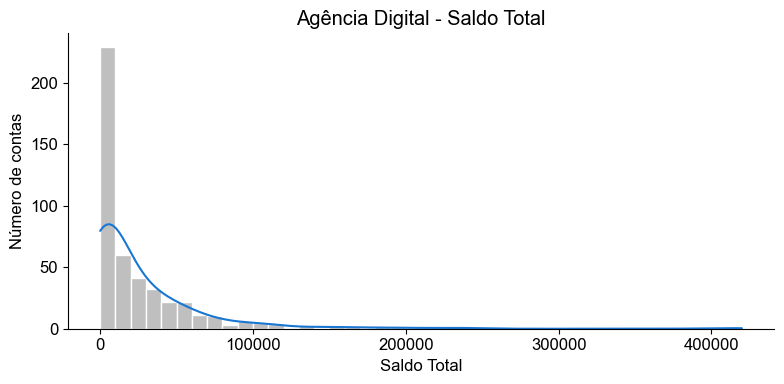

In [6]:
# Define o estilo e o tamanho do gráfico
fig, ax = plt.subplots(figsize = (8,4))
sns.set_style("whitegrid", {'axes.grid' : False})
cor_histograma = "gray"

# Cria o histograma
sns.histplot(df_contas['saldo_total'].loc[df_contas['cod_agencia'] == 7], kde=True, bins=range(0, 420000, 10000), color= cor_histograma)

# Adiciona título e rótulos
ax.set_title('Agência Digital - Saldo Total')
ax.lines[0].set_color('#1976D2')
ax.set_xlabel("Saldo Total", fontsize=12)
ax.set_ylabel("Número de contas", fontsize=12)
ax.grid(False)

# Remove a borda superior e direita para limpeza
sns.despine()

plt.tight_layout()

Podemos ver que a maioria das contas possuem um valor baixo de Saldo Total (entre 0 e 100 reais).

Observando o histograma acima e pela curvatura da linha azul podemos entender que é uma distribuição com assimetria positiva ou à direita, isto é, que a maioria dos valores são menores e que existem poucos valores grandes.

In [7]:
df_contas.groupby('cod_agencia')['saldo_disponivel'].describe()

,count,mean,std,min,25%,50%,75%,max
cod_agencia,,,,,,,,
1,118.0,30021.365169,37581.278654,16.22,2976.3025,16965.535,41252.3900,211636.04
2,101.0,31627.550990,45043.438023,0.60,3376.4300,17130.820,40067.4800,231759.98
3,76.0,25832.240000,31583.425041,11.27,2562.5375,14782.190,34525.5625,139067.40
4,65.0,21955.214615,29132.019191,9.76,1976.6800,8269.420,32091.9900,120169.19
5,61.0,26313.998689,36853.999934,12.23,1284.2900,13919.020,34814.8800,172773.53
6,52.0,22289.431923,50839.419342,12.72,775.8375,8936.340,21145.0950,333783.57
7,460.0,25172.050739,42880.636441,2.57,680.5975,10013.515,32578.5675,411617.06
8,30.0,15987.414667,29055.467846,8.36,219.4775,980.505,14102.7175,122899.57
9,30.0,21164.487667,30639.926485,78.44,494.1725,8001.760,29348.1325,143607.04


Observando a tabela acima, podemos extrair as seguintes informações:

* Observando todas agências listadas, a conta com menor Saldo Disponível tem 0,60 reais e a com maior Saldo Disponível tem 411.617,06 reais, onde a com saldo menor está na Agência 2 - São Paulo/SP e a com maior saldo está na Agência Digital.

Focamos em analisar sob o ponto de vista da Agência Digital.

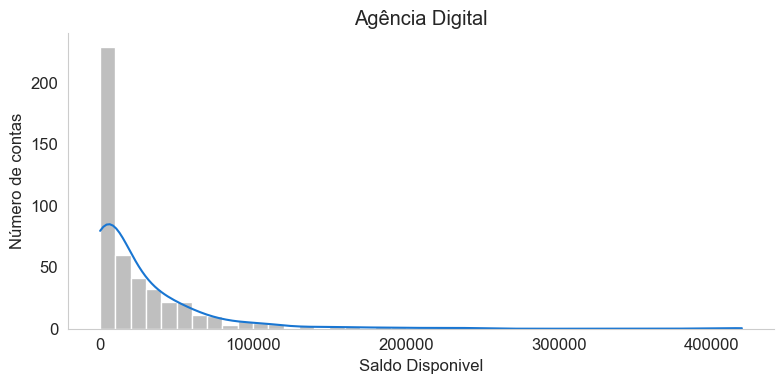

In [8]:
# Define o estilo e o tamanho do gráfico
fig, ax = plt.subplots(figsize = (8,4))
sns.set_style("whitegrid", {'axes.grid' : False})
cor_histograma = "gray"

# Cria o histograma
sns.histplot(df_contas['saldo_total'].loc[df_contas['cod_agencia'] == 7], kde=True, bins=range(0, 420000, 10000), color= cor_histograma)

# Adiciona título e rótulos
ax.set_title('Agência Digital')
ax.lines[0].set_color('#1976D2')
ax.set_xlabel("Saldo Disponivel", fontsize=12)
ax.set_ylabel("Número de contas", fontsize=12)
ax.grid(False)

# Remove a borda superior e direita para limpeza
sns.despine()

plt.tight_layout()

Podemos ver que a maioria das contas possuem um valor baixo de Saldo Disponível (entre 0 e 100 reais).

Observando o histograma acima e pela curvatura da linha azul podemos entender que é uma distribuição com assimetria positiva ou à direita, isto é, que a maioria dos valores são menores e que existem poucos valores grandes.

#### Conclusão e recomendação

* Temos somente clientes PF, devemos avaliar se vale a pena seguir essa linha ou se deveríamos expandir nossas contas para o público PJ (Pessoa Jurídica) também.

_**Observação:** Temos 248 contas onde o saldo disponível é maior que o saldo total, talvez se dê a alguma regra de negócio que não conheça, mas achei estranho. Decidi manter já que representa quase 1/3 das contas._